<a href="https://colab.research.google.com/github/soma2000-lang/covid-_19-prediction-using-chest-x-ray-images/blob/main/Copy_of_Covid19_detection_using_X_ray_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 1 : Import Libraries

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# TASK 2 : Clone & Explore dataset

In [11]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 40.05 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [12]:
#set the path to the main
import os 
main_dir="/content/datasets/Data"


#set the path to the train dir
train_dir=os.path.join(main_dir,'train')
#set the path to the test dir
test_dir=os.path.join(main_dir,'test')

#directory with the training covid images
train_covid_dir=os.path.join(train_dir,'COVID19')
#directory with the training normal images
train_normal_dir=os.path.join(train_dir,'NORMAL')
#directory with the testing covid images
test_covid_dir=os.path.join(test_dir,'COVID19')
#directory with the testing normal images
test_normal_dir=os.path.join(test_dir,'NORMAL')

In [13]:
#print the filenames
train_covid_names=os.listdir(train_covid_dir)
print(train_covid_names[:10])
train_normal_names=os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names=os.listdir(test_covid_dir)
print(test_covid_names[:10])
test_normal_names=os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(510).jpg', 'COVID19(107).jpg', 'COVID19(378).jpg', 'COVID19(471).jpg', 'COVID19(330).jpg', 'COVID19(429).jpg', 'COVID19(239).jpg', 'COVID19(31).jpg', 'COVID19(78).jpg', 'COVID19(307).jpg']
['NORMAL(1255).jpg', 'NORMAL(986).jpg', 'NORMAL(1556).jpg', 'NORMAL(1389).jpg', 'NORMAL(1149).jpg', 'NORMAL(819).jpg', 'NORMAL(708).jpg', 'NORMAL(1254).jpg', 'NORMAL(979).jpg', 'NORMAL(1281).jpg']
['COVID19(482).jpg', 'COVID19(433).jpg', 'COVID-19 (875).jpg', 'COVID19(462).jpg', 'COVID19(549).jpg', 'COVID19(426).jpg', 'COVID19(346).jpg', 'COVID19(210).jpg', 'COVID19(483).jpg', 'COVID19(562).jpg']
['NORMAL(1394).jpg', 'NORMAL(440).jpg', 'NORMAL(155).jpg', 'NORMAL(1434).jpg', 'NORMAL(1195).jpg', 'NORMAL(219).jpg', 'NORMAL(321).jpg', 'NORMAL(1270).jpg', 'NORMAL(702).jpg', 'NORMAL(490).jpg']


In [14]:
#print the total no of images present in each dir
print("total images in the training set:",len(train_covid_names+train_normal_names))
print("total images in the testing set:",len(test_covid_names+test_normal_names))


total images in the training set: 1811
total images in the testing set: 484


# TASK 3 : Data Visualization

['/content/datasets/Data/train/COVID19/COVID19(510).jpg', '/content/datasets/Data/train/COVID19/COVID19(107).jpg', '/content/datasets/Data/train/COVID19/COVID19(378).jpg', '/content/datasets/Data/train/COVID19/COVID19(471).jpg', '/content/datasets/Data/train/COVID19/COVID19(330).jpg', '/content/datasets/Data/train/COVID19/COVID19(429).jpg', '/content/datasets/Data/train/COVID19/COVID19(239).jpg', '/content/datasets/Data/train/COVID19/COVID19(31).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(1255).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(986).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1556).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1389).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1149).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(819).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(708).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1254).jpg']


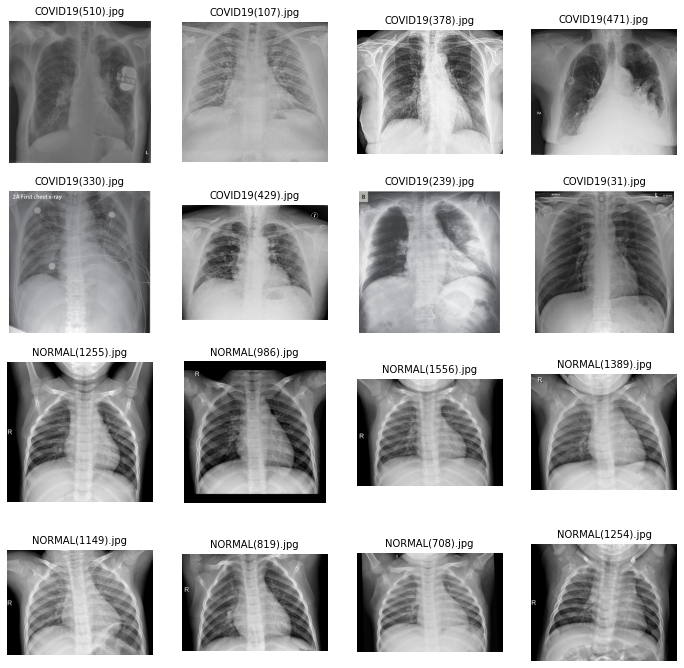

In [15]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg

#set the number of columns and rows
rows=4
cols=4
#set the figure size
fig=plt.gcf()
fig.set_size_inches(12,12)
#get the filenames from the covid & normal dir of the train dataset
covid_pic=[os.path.join(train_covid_dir,filename)for filename in train_covid_names[0:8]]
normal_pic=[os.path.join(train_normal_dir,filename)for filename in train_normal_names[0:8]]
#print the list
print(covid_pic)
print(normal_pic)

#merge the covid and normal list
merge_list=covid_pic+normal_pic
for i,img_path in enumerate(covid_pic+normal_pic):
  data=img_path.split('/',6)[6]
  sp=plt.subplot(rows,cols,i+1)
  sp.axis('Off')
  img=mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')
plt.show()

# TASK 4 : Data Preprocessing & Augmentation

In [16]:
# generate training,testing and validation batches 
dgen_train=ImageDataGenerator(rescale=1./255,validation_split=0.2,zoom_range=0.2,horizontal_flip=True)
dgen_validation=ImageDataGenerator(rescale=1./255)
dgen_test=ImageDataGenerator(rescale=1./255)
train_generator=dgen_train.flow_from_directory(train_dir,target_size=(150,150),subset='training',batch_size=32,class_mode='binary')
validation_generator=dgen_train.flow_from_directory(train_dir,target_size=(150,150),subset='validation',batch_size=32,class_mode='binary')
test_generator=dgen_test.flow_from_directory(test_dir,target_size=(150,150),batch_size=32,class_mode='binary')


Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [17]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [18]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

# TASK 5 : Build Convolutional Neural Network Model

In [19]:
#@title Default title text
model=Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))
# pooling layerel.add
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))
# add another convolutional layer
model.add(MaxPooling2D(pool_size=(2,2)))
# pooling layer
model.add(Dropout(0.5))
# place a dropout layer
model.add(Flatten())
# Flatten layer
model.add(Dense(256,activation='relu'))
# add a dense layer : amount of nodes, activation
model.add(Dropout(0.5))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

# TASK 6 : Compile & Train the Model

In [20]:
#compile the model
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
#train the 
history=model.fit(train_generator,epochs=30,validation_data=validation_generator)

Epoch 1/30
46/46 [==============================] - 48s 1s/step - loss: 0.6055 - accuracy: 0.8061 - val_loss: 0.4119 - val_accuracy: 0.8867
Epoch 2/30
46/46 [==============================] - 48s 1s/step - loss: 0.2205 - accuracy: 0.9068 - val_loss: 0.1879 - val_accuracy: 0.9420
Epoch 3/30
46/46 [==============================] - 49s 1s/step - loss: 0.1602 - accuracy: 0.9413 - val_loss: 0.1486 - val_accuracy: 0.9530
Epoch 4/30
46/46 [==============================] - 51s 1s/step - loss: 0.1543 - accuracy: 0.9524 - val_loss: 0.1313 - val_accuracy: 0.9558
Epoch 5/30
46/46 [==============================] - 50s 1s/step - loss: 0.1383 - accuracy: 0.9462 - val_loss: 0.1397 - val_accuracy: 0.9613
Epoch 6/30
46/46 [==============================] - 50s 1s/step - loss: 0.1166 - accuracy: 0.9669 - val_loss: 0.1066 - val_accuracy: 0.9696
Epoch 7/30
46/46 [==============================] - 50s 1s/step - loss: 0.1256 - accuracy: 0.9600 - val_loss: 0.1081 - val_accuracy: 0.9696
Epoch 8/30
46/46 [==

# TASK 7 : Performance Evaluation

In [22]:
#get the keys of history object

In [23]:
#plot graph between training and validation loss
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

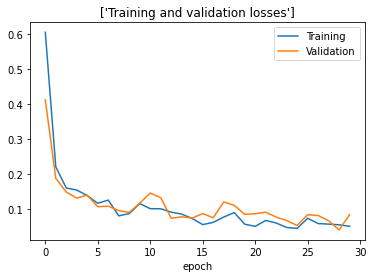

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title(['Training and validation losses'])
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

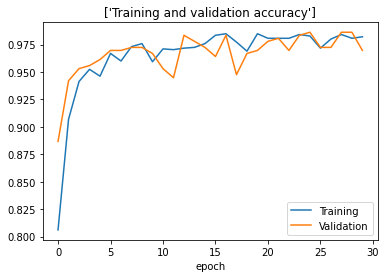

In [25]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title(['Training and validation accuracy'])
plt.xlabel('epoch')

In [26]:
# get the test acuarcy and loss
test_loss,test_acc=model.evaluate(test_generator)
print('test loss:{} test acc:{}'.format(test_acc,test_loss))

16/16 [==============================] - 10s 626ms/step - loss: 0.0645 - accuracy: 0.9793
test loss:0.9793388247489929 test acc:0.06453290581703186


# TASK 8 : Prediction On New Data

In [ ]:
from google.colab import files
from keras.preprocessing import image
upload=files.upload()
for filename in upload.keys():
  img_path='/content/'+filename
  img=image.load_image(image_path,target_size=(150,150))
  images=image.img_to_arr(img)
  images=np.expand_dims(images,axis=0)
  prediction=model.predict(images)
  print(filename)
  if(prediction==0):
    print("covid detected")
  else:
    print(" covid not detected")